# **Tensor Flow - Tugas 4 Artificial Intelligence Praktikum**

Nama: Lukas Austin

Npm: 140810230011

Kelas: A

## **Import hal-hal yang dibutuhkan termasuk Tensor Flow yang dibutuhkan dalam tugas ini.**

In [105]:
import urllib.request
import zipfile
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import Callback

## **Download dan ekstrak data**
Mengunduh dan mengekstrak dataset gambar kuda dan manusia yang akan digunakan dalam pelatihan dan validasi model.

In [106]:
def download_and_extract_data():
    # Dataset training
    data_url_1 = 'https://github.com/dicodingacademy/assets/releases/download/release-horse-or-human/horse-or-human.zip'
    urllib.request.urlretrieve(data_url_1, 'horse-or-human.zip')
    local_file = 'horse-or-human.zip'
    zip_ref = zipfile.ZipFile(local_file, 'r')
    zip_ref.extractall('data/horse-or-human')

    # Dataset validasi
    data_url_2 = 'https://github.com/dicodingacademy/assets/raw/main/Simulation/machine_learning/validation-horse-or-human.zip'
    urllib.request.urlretrieve(data_url_2, 'validation-horse-or-human.zip')
    local_file = 'validation-horse-or-human.zip'
    zip_ref = zipfile.ZipFile(local_file, 'r')
    zip_ref.extractall('data/validation-horse-or-human')
    zip_ref.close()

download_and_extract_data()

## **Persiapan dan Preprocessing Dataset**
Tahapan ini melakukan augmentasi dan normalisasi dataset untuk pelatihan dan validasi model klasifikasi gambar kuda dan manusia.

In [107]:
TRAINING_DIR = 'data/horse-or-human'
VALIDATION_DIR = 'data/validation-horse-or-human'

train_datagen = ImageDataGenerator(
      rescale=1/255,
      rotation_range=40,
      horizontal_flip=True,
      shear_range=0.2,
      zoom_range=0.2,
      fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


# **Model**

In [140]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [141]:
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_127 (Conv2D)             │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_84 (Dropout)            │ (None, 148, 148, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_126               │ (None, 74, 74, 16)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_128 (Conv2D)             │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_85 (Dropout)            │ (None, 72, 72, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_127               │ (None, 36, 36, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_129 (Conv2D)             │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_86 (Dropout)            │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_128               │ (None, 17, 17, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_36 (Flatten)            │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 256)            │     4,735,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_87 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,759,073 (18.15 MB)

 Trainable params: 4,759,073 (18.15 MB)

 Non-trainable params: 0 (0.00 B)

##**Proses Training**

In [184]:
#Fungsi untuk memberhentikan training jika sudah memenuhi standar
class StopAt83Acc(Callback):
    def on_epoch_end(self, epoch, logs=None):
        acc = logs.get('accuracy')
        val_acc = logs.get('val_accuracy')
        if acc is not None and val_acc is not None:
            if acc > 0.83 and val_acc > 0.83:
                print(f"\nAccuracy dan Validation Accuracy sudah > 83%! (Epoch {epoch+1})")
                self.model.stop_training = True

In [143]:
callback = StopAt83Acc()

history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    verbose=1,
    callbacks=[callback]
)

Epoch 1/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.5084 - loss: 1.4772 - val_accuracy: 0.6406 - val_loss: 0.9917
Epoch 2/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8081 - loss: 0.4207 - val_accuracy: 0.7930 - val_loss: 0.6069
Epoch 3/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8359 - loss: 0.3488 - val_accuracy: 0.8086 - val_loss: 0.4566
Epoch 4/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8859 - loss: 0.3101 - val_accuracy: 0.7695 - val_loss: 0.7750
Epoch 5/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.8930 - loss: 0.2480 - val_accuracy: 0.7734 - val_loss: 0.8275
Epoch 6/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9215 - loss: 0.1980 - val_accuracy: 0.7188 - val_loss: 1.0963
Epoch 7/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9516 - loss: 0.1391 - val_accuracy: 0.7695 - val_loss: 0.9969
Epoch 8/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.9578 - loss: 0.1066 - val_accuracy: 0.7227 - val_loss:

##**Hasil Training dan Save Model**

In [146]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

final_train_acc = acc[-1]*100
final_val_acc = val_acc[-1]*100
final_train_loss = loss[-1]
final_val_loss = val_loss[-1]

print("\nHASIL TRAINING:")
print(f"Training Accuracy Terakhir    : {final_train_acc:.2f}%")
print(f"Validation Accuracy Terakhir  : {final_val_acc:.2f}%")
print(f"Training Loss Terakhir        : {final_train_loss:.4f}")
print(f"Validation Loss Terakhir      : {final_val_loss:.4f}")

if final_train_acc > 83 and final_val_acc > 83:
    print("Model berhasil mencapai target Accuracy dan Validation Accuracy yaitu sebesar > 83%!")
else:
    print("Model belum mencapai target akurasi. Evaluasi diperlukan!")



HASIL TRAINING:
Training Accuracy Terakhir    : 97.47%
Validation Accuracy Terakhir  : 93.75%
Training Loss Terakhir        : 0.0761
Validation Loss Terakhir      : 0.1677
Model berhasil mencapai target Accuracy dan Validation Accuracy yaitu sebesar > 83%!


In [178]:
model.save("model_05.h5")
print ("\n\n")



## **Percobaan model**

In [172]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model = load_model('model_05.h5')

In [181]:
def predict_and_display(image_path, model):
    #Load dan preprocess gambar
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    #Prediksi
    prediction = model.predict(img_array)[0][0]
    confidence = prediction if prediction > 0.5 else 1 - prediction
    class_name = "MANUSIA" if prediction > 0.5 else "KUDA"

    #Tampilkan gambar dan hasil
    plt.imshow(image.load_img(image_path))
    plt.axis('off')
    plt.title(f"Prediksi: {class_name}\nConfidence: {confidence*100:.2f}%")
    plt.show()
    print(f"Gambar ini diprediksi sebagai: {class_name}")
    print(f"Confidence: {confidence*100:.2f}% \n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


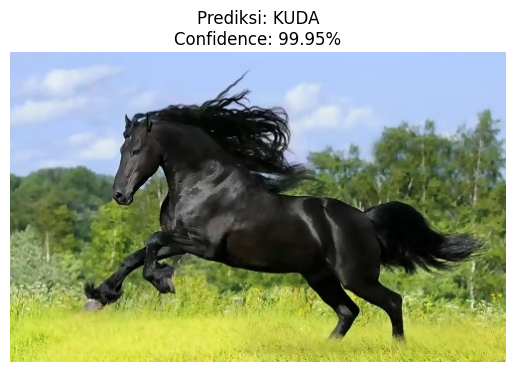

Gambar ini diprediksi sebagai: KUDA
Confidence: 99.95% 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


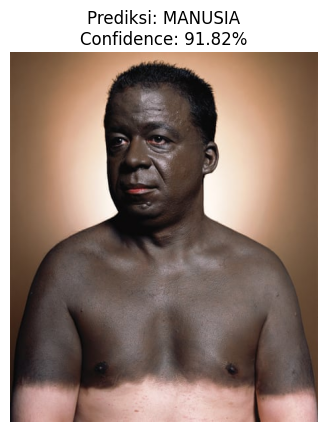

Gambar ini diprediksi sebagai: MANUSIA
Confidence: 91.82% 



In [182]:
#Contoh prediksi gambar KUDA (gambar ambil dari google)
horse_url = 'https://ptr.fst.uin-alauddin.ac.id/assets/gambar/artikel/ptr-artikel-231.jpg'
urllib.request.urlretrieve(horse_url, "test_horse.jpg")
predict_and_display("test_horse.jpg", model)

#Contoh prediksi gambar MANUSIA (gambar ambil dari google)
human_url = 'https://i.guim.co.uk/img/media/85b5c0ba3d6036d58729076b5ef59de798ee2937/0_43_3465_4157/master/3465.jpg?width=465&dpr=1&s=none&crop=none'
urllib.request.urlretrieve(human_url, "test_human.jpg")
predict_and_display("test_human.jpg", model)
